In [81]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [82]:
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
auto = pd.read_csv("Data/auto/imports-85.data", header = None, names = cols)
print(auto.head())

   symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb_weight engine_type num_cylinders  engine_size fuel_system  \
0    48.8

This dataset is based on 1985 Ward's Automotive Yearbook

data description: https://archive.ics.uci.edu/ml/datasets/Automobile

In [83]:
auto = auto.replace("?", np.nan)
print(auto.info(), auto.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [84]:
#drop the char cols first
auto.drop(["make", "fuel_type"], axis = 1, inplace = True)

In [85]:
for col in auto.columns:
    print(col, auto[col].value_counts())

symboling  0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
normalized_losses 161    11
91      8
150     7
128     6
134     6
104     6
65      5
103     5
85      5
94      5
102     5
168     5
95      5
74      5
93      4
148     4
106     4
122     4
118     4
125     3
83      3
154     3
137     3
115     3
101     3
194     2
129     2
108     2
158     2
113     2
110     2
192     2
89      2
197     2
145     2
164     2
81      2
87      2
153     2
119     2
188     2
77      1
142     1
78      1
107     1
98      1
186     1
231     1
121     1
90      1
256     1
Name: normalized_losses, dtype: int64
aspiration std      168
turbo     37
Name: aspiration, dtype: int64
num_doors four    114
two      89
Name: num_doors, dtype: int64
body_style sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64
drive_wheels fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int

In [86]:

convert = {"num_doors":{"four":4, "two":2}, "aspiration":{"std":0, "turbo":1}, "num_cylinders":{"four": 4, "six": 6, "five": 5, "eight": 8, "two":2, "twelve":12, "three": 3}}
#convert to numeric: num_doors, turbo, num_cylinders
auto = auto.replace(convert)           

In [87]:
auto.drop(["body_style", "drive_wheels", "engine_location", "fuel_system"], axis = 1, inplace = True)
auto.drop(["engine_type"], axis = 1, inplace = True)

In [90]:
print(auto.head())
print(auto.info())

   symboling normalized_losses  aspiration  num_doors  wheel_base  length  \
0          3               NaN           0        2.0        88.6   168.8   
1          3               NaN           0        2.0        88.6   168.8   
2          1               NaN           0        2.0        94.5   171.2   
3          2               164           0        4.0        99.8   176.6   
4          2               164           0        4.0        99.4   176.6   

   width  height  curb_weight  num_cylinders  engine_size  bore stroke  \
0   64.1    48.8         2548              4          130  3.47   2.68   
1   64.1    48.8         2548              4          130  3.47   2.68   
2   65.5    52.4         2823              6          152  2.68   3.47   
3   66.2    54.3         2337              4          109  3.19   3.40   
4   66.4    54.3         2824              5          136  3.19   3.40   

   compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
0                9.

In [91]:
auto[["normalized_losses","bore", "stroke", "horsepower", "peak_rpm", "price"]] = auto[["normalized_losses","bore", "stroke", "horsepower", "peak_rpm", "price"]].astype(float)

In [92]:
auto.info()
auto.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
aspiration           205 non-null int64
num_doors            203 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
num_cylinders        205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(12), int64(7)
memory usage: 30.5 KB


(205, 19)

In [93]:
auto["normalized_losses"].replace(np.nan, auto["normalized_losses"].mean(), inplace = True)

In [94]:
print(auto.isnull().sum())
cols = ["num_doors", "bore", "stroke", "horsepower", "peak_rpm", "price"]
print(auto[auto["num_doors"].isnull()])
print(auto["num_doors"].value_counts())
auto["num_doors"].replace(np.nan, 4, inplace = True)

symboling            0
normalized_losses    0
aspiration           0
num_doors            2
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_cylinders        0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64
    symboling  normalized_losses  aspiration  num_doors  wheel_base  length  \
27          1              148.0           1        NaN        93.7   157.3   
63          0              122.0           0        NaN        98.8   177.8   

    width  height  curb_weight  num_cylinders  engine_size  bore  stroke  \
27   63.8    50.6         2191              4           98  3.03    3.39   
63   66.5    55.5         2443              4          122  3.39    3.39   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg    price  
27   

In [95]:
print(auto[auto["bore"].isnull()])
auto["bore"].replace(np.nan, auto["bore"].mean(), inplace = True)
auto["stroke"].replace(np.nan, auto["stroke"].mean(), inplace = True)

    symboling  normalized_losses  aspiration  num_doors  wheel_base  length  \
55          3              150.0           0        2.0        95.3   169.0   
56          3              150.0           0        2.0        95.3   169.0   
57          3              150.0           0        2.0        95.3   169.0   
58          3              150.0           0        2.0        95.3   169.0   

    width  height  curb_weight  num_cylinders  engine_size  bore  stroke  \
55   65.7    49.6         2380              2           70   NaN     NaN   
56   65.7    49.6         2380              2           70   NaN     NaN   
57   65.7    49.6         2385              2           70   NaN     NaN   
58   65.7    49.6         2500              2           80   NaN     NaN   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg    price  
55                9.4       101.0    6000.0        17           23  10945.0  
56                9.4       101.0    6000.0        17           23 

In [96]:
print(auto.isnull().sum())

symboling            0
normalized_losses    0
aspiration           0
num_doors            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_cylinders        0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64


In [97]:
print(auto[auto["horsepower"].isnull()])

     symboling  normalized_losses  aspiration  num_doors  wheel_base  length  \
130          0              122.0           0        4.0        96.1   181.5   
131          2              122.0           0        2.0        96.1   176.8   

     width  height  curb_weight  num_cylinders  engine_size  bore  stroke  \
130   66.5    55.2         2579              4          132  3.46     3.9   
131   66.6    50.5         2460              4          132  3.46     3.9   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg   price  
130                8.7         NaN       NaN        23           31  9295.0  
131                8.7         NaN       NaN        23           31  9895.0  


In [98]:
auto["horsepower"].replace(np.nan, auto["horsepower"].mean(), inplace = True)
auto["peak_rpm"].replace(np.nan, auto["peak_rpm"].mean(), inplace = True)
# instead of using df.replace, the solution uses df.fillna(df.mean()) which is the same way I use here but much easier

In [99]:
#for the missing price ones, as it's the predictive values, have to drop these 4 rows
auto.shape

(205, 19)

In [100]:
auto.dropna(subset = ["price"], axis = 0, inplace = True)

In [101]:
# Normalize all the rows
price = auto["price"]
auto = (auto - auto.min())/(auto.max() - auto.min())
auto["price"] = price
print(auto.describe())
print(auto.isnull().sum())

        symboling  normalized_losses  aspiration   num_doors  wheel_base  \
count  201.000000         201.000000  201.000000  201.000000  201.000000   
mean     0.568159           0.298429    0.179104    0.572139    0.355598   
std      0.250960           0.167520    0.384397    0.496004    0.176862   
min      0.000000           0.000000    0.000000    0.000000    0.000000   
25%      0.400000           0.188482    0.000000    0.000000    0.230321   
50%      0.600000           0.298429    0.000000    1.000000    0.303207   
75%      0.800000           0.376963    0.000000    1.000000    0.460641   
max      1.000000           1.000000    1.000000    1.000000    1.000000   

           length       width      height  curb_weight  num_cylinders  \
count  201.000000  201.000000  201.000000   201.000000     201.000000   
mean     0.494045    0.477697    0.497222     0.414145       0.236318   
std      0.183913    0.179613    0.203985     0.200658       0.105945   
min      0.000000    0.

In [165]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#knn train_test function
def knn_train_test(traincol, targetcol, dataframe):
    np.random.seed(1)
    df = dataframe.iloc[np.random.permutation(len(dataframe))]
    train = df[:150]
    test = df[150:]
    model = KNeighborsRegressor()
    model.fit(train[[traincol]], train[targetcol])
    predict = model.predict(test[[traincol]])
    mse = mean_squared_error(test[targetcol], predict)
    rmse = mse ** .5
    return rmse
rmse_series = {}
train_cols = auto.columns.drop("price")
for col in train_cols:
    rmse_series[col] = knn_train_test(col, "price", auto)
#convert to panda series to be sorted
rmse_result = pd.Series(rmse_series)
rmse_result.sort_values()

engine_size           3051.434222
city_mpg              3684.803554
width                 3917.227670
curb_weight           4011.450036
wheel_base            4161.947972
highway_mpg           4323.502530
num_cylinders         4730.679949
horsepower            4756.983755
length                5416.294064
compression_ratio     5958.572328
normalized_losses     6231.311124
peak_rpm              6326.471744
bore                  6506.581507
height                6666.667678
stroke                6939.691440
aspiration            7293.297564
num_doors             7811.982033
symboling            11034.058934
dtype: float64

In [154]:
#modify the function to accept parameter for k value
def knn_train_test2(k, traincol, targetcol, dataframe):
    np.random.seed(1)
    df = dataframe.iloc[np.random.permutation(len(dataframe))]
    train = df[:150]
    test = df[150:]
    model = KNeighborsRegressor(k)
    model.fit(train[[traincol]], train[targetcol])
    predict = model.predict(test[[traincol]])
    mse = mean_squared_error(test[targetcol], predict)
    rmse = mse ** .5
    return rmse
result = pd.DataFrame()
train_cols = auto.columns.drop("price")
kvalues = [1, 3, 5, 7, 9]
for k in kvalues:
    rmse_series = {}
    for col in train_cols:
        rmse_series[col] = knn_train_test2(k, col, "price", auto)
    rmse_result = pd.Series(rmse_series, name = k)
    result[k]=rmse_result
print(result[result == result.min()])

                             1            3            5            7  \
aspiration                 NaN          NaN          NaN          NaN   
bore                       NaN          NaN          NaN          NaN   
city_mpg                   NaN          NaN          NaN          NaN   
compression_ratio          NaN          NaN          NaN          NaN   
curb_weight                NaN          NaN          NaN          NaN   
engine_size                NaN  2726.617989  3051.434222  3009.880997   
height                     NaN          NaN          NaN          NaN   
highway_mpg                NaN          NaN          NaN          NaN   
horsepower                 NaN          NaN          NaN          NaN   
length                     NaN          NaN          NaN          NaN   
normalized_losses          NaN          NaN          NaN          NaN   
num_cylinders              NaN          NaN          NaN          NaN   
num_doors                  NaN          NaN        

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

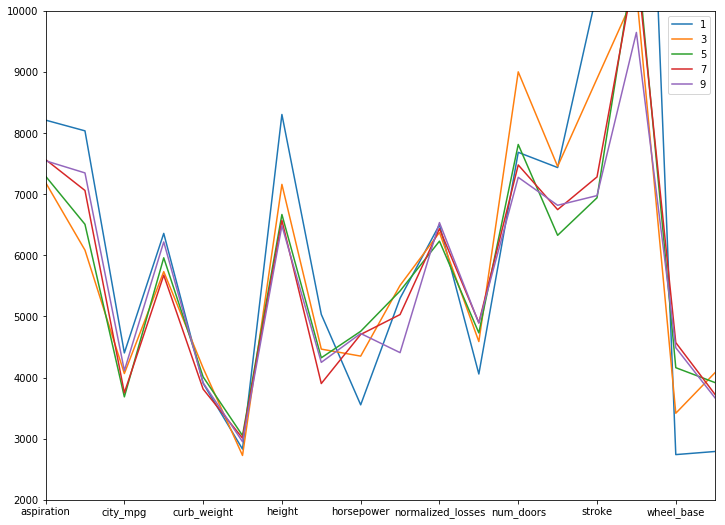

In [164]:
result.plot(figsize = (12,9),ylim = (2000,10000))



In [168]:
#modify the function to incorporate multiple columns
def knn_train_test3(traincol, targetcol, dataframe):
    np.random.seed(1)
    df = dataframe.iloc[np.random.permutation(len(dataframe))]
    train = df[:150]
    test = df[150:]
    model = KNeighborsRegressor()
    model.fit(train[traincol], train[targetcol])
    predict = model.predict(test[traincol])
    mse = mean_squared_error(test[targetcol], predict)
    rmse = mse ** .5
    return rmse
ranking = rmse_result.sort_values()

In [180]:
#top combinations with top_n_ranked predictor
for i in range(2,6):
    print(ranking.index[:i], knn_train_test3(ranking.index[:i],"price",auto))
    

Index(['engine_size', 'city_mpg'], dtype='object') 2887.65323888
Index(['engine_size', 'city_mpg', 'width'], dtype='object') 2617.73526723
Index(['engine_size', 'city_mpg', 'width', 'curb_weight'], dtype='object') 2589.59592265
Index(['engine_size', 'city_mpg', 'width', 'curb_weight', 'wheel_base'], dtype='object') 2785.46102052


In [183]:
#modify the function to take in multivariable and k-value
def knn_train_test4(k, traincol, targetcol, dataframe):
    np.random.seed(1)
    df = dataframe.iloc[np.random.permutation(len(dataframe))]
    train = df[:150]
    test = df[150:]
    model = KNeighborsRegressor(k)
    model.fit(train[traincol], train[targetcol])
    predict = model.predict(test[traincol])
    mse = mean_squared_error(test[targetcol], predict)
    rmse = mse ** .5
    return rmse
kranking = pd.DataFrame()
for k in range(1,26):
    rmse_series = {}
    for col in train_cols:
        rmse_series[col] = knn_train_test4(k, [col], "price", auto)
    rmse_result = pd.Series(rmse_series, name = k)
    ranking = rmse_result.sort_values()
    varranking = dict()
    for i in range(2, 7):
#        print("k =", k, "num_var= ", i, ranking.index[:i], knn_train_test4(k, ranking.index[:i],"price",auto))
        varranking["numvar =" + str(i)] = knn_train_test4(k, ranking.index[:i],"price",auto)
    varseries = pd.Series(varranking)
    kranking[k] = varseries
print(kranking)    
    
        

                    1            2            3            4            5   \
numvar =2  4437.156343  3180.781519  3051.542957  3197.997191  2792.012710   
numvar =3  2135.698164  2737.209363  2938.593962  3051.879296  2797.747685   
numvar =4  2208.623376  2353.175378  2621.713409  2297.287469  2587.380872   
numvar =5  2120.984118  2250.203873  2516.605248  2588.640862  2543.664239   
numvar =6  2123.715829  2191.497081  2453.977213  2532.360879  2537.128715   

                    6            7            8            9            10  \
numvar =2  2876.669568  2708.948135  2804.629833  2823.082238  2885.795088   
numvar =3  2754.592010  2634.729783  2652.873991  2608.116064  2673.756613   
numvar =4  2648.112514  2664.826976  2553.864609  2589.595923  2845.049675   
numvar =5  2714.255019  2613.434012  2663.381774  2722.911476  2932.146476   
numvar =6  2520.730726  2573.884855  2662.578452  2686.020827  2715.694788   

                    11           12           13           14 

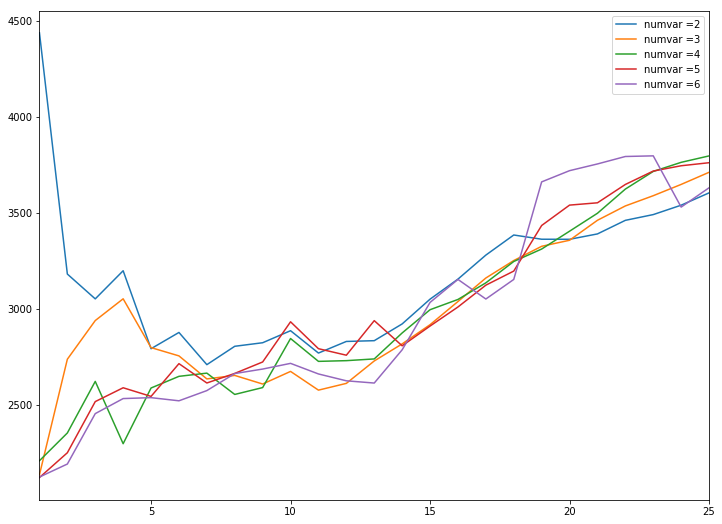

In [185]:
kranking.transpose().plot(figsize = (12,9))